In [3]:
# following: 
# https://learn.deeplearning.ai/vector-databases-embeddings-applications/lesson/2/how-to-obtain-vector-representations-of-data

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from scipy.stats import norm

2023-11-17 12:37:38.401865: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-17 12:37:39.118326: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 12:37:39.118375: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 12:37:39.121106: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 12:37:39.520257: I tensorflow/core/platform/cpu_feature_g

In [4]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()
# Normalize and flatten
x_tr, x_te = x_tr.astype('float32')/255., x_te.astype('float32')/255.
x_tr_flat, x_te_flat = x_tr.reshape(x_tr.shape[0], -1), x_te.reshape(x_te.shape[0], -1)

print(x_tr.shape, x_te.shape)
print(x_tr_flat.shape, x_te_flat.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [5]:
batch_size, n_epoch = 100, 50
n_hidden, z_dim = 256, 2

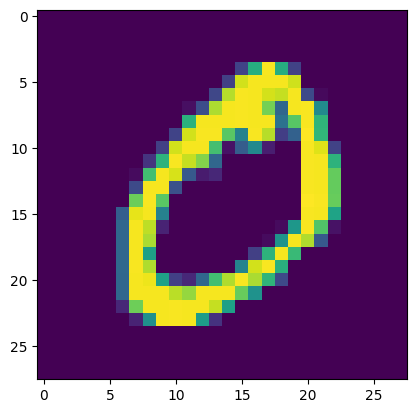

In [8]:
plt.imshow(x_tr[1])

In [17]:
def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(batch_size, z_dim), mean=0., stddev=1.)
    return mu + K.exp(log_var) * eps

In [18]:
# Encoder: 784 --> 256 --> 128 --> 2
inputs_flat = Input(shape=(x_tr_flat.shape[1:]))
x_flat = Dense(n_hidden, activation='relu')(inputs_flat)
x_flat = Dense(n_hidden//2, activation='relu')(x_flat)

# hidden state
mu_flat = Dense(z_dim)(x_flat) 
log_var_flat = Dense(z_dim)(x_flat) 

z_flat = Lambda(sampling, output_shape=(z_dim,))([mu_flat, log_var_flat])

In [16]:
print(f"{x_tr_flat.shape[1:]}, {x_tr_flat.shape[1]}")

(784,), 784


In [ ]:
# Decoder: 2 --> 128 --> 256 --> 784

latent_inputs = Input(shape=(z_dim,))
z_decoder1 = Dense(n_hidden//2, activation='relu')
z_decoder2 = Dense(n_hidden, activation='relu')
y_decoder = Dense(x_tr_flat.shape[1], activation='sigmoid')
z_decoded = z_decoder1(latent_inputs)
z_decoded = z_decoder2(z_decoded)
y_decoded = y_decoder(z_decoded)
decoder_flat = Model(latent_inputs, y_decoder(z_decoded))